<a href="https://colab.research.google.com/github/ronv3/spotify-song-recommendations/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load and prepare the data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathway = '/content/drive/MyDrive/Colab Notebooks/'
data = pd.read_csv(pathway+"KaggleDataset.csv")

#data = pd.read_csv('KaggleDataset.csv')
data = data.dropna()  # Drop rows with missing values
data['is_hit'] = (data['popularity'] > 75).astype(int)  # Define 'hit' songs
data.shape

# Separate the dataset into two classes
popular_songs = data[data['is_hit'] == 1]
unpopular_songs = data[data['is_hit'] == 0]

# Downsample the majority class (unpopular songs)
unpopular_sampled = unpopular_songs.sample(n=len(popular_songs), random_state=42)

# Combine the balanced dataset
balanced_data = pd.concat([popular_songs, unpopular_sampled])

# Shuffle the dataset
data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
data.shape


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(4828, 22)

Analyze numerical features:

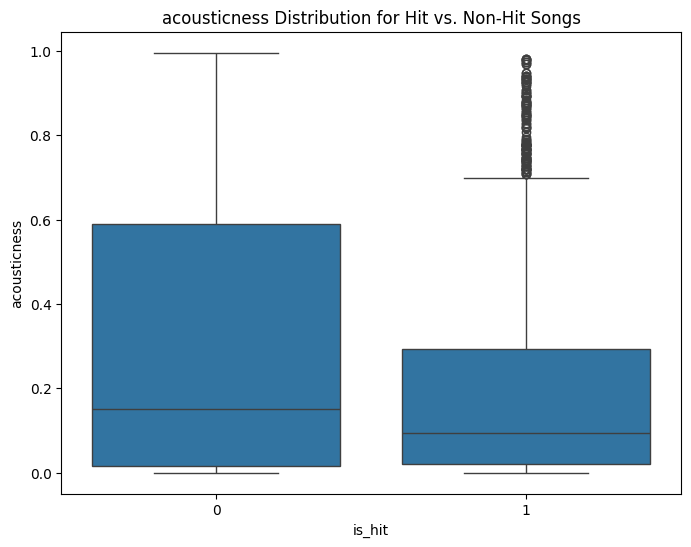

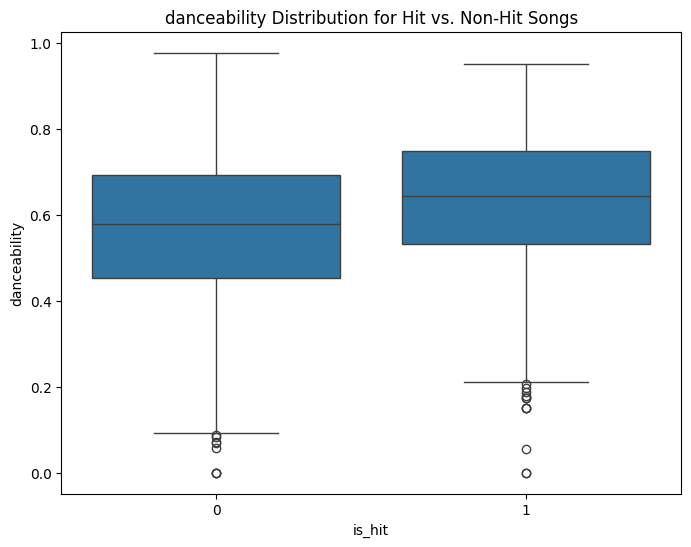

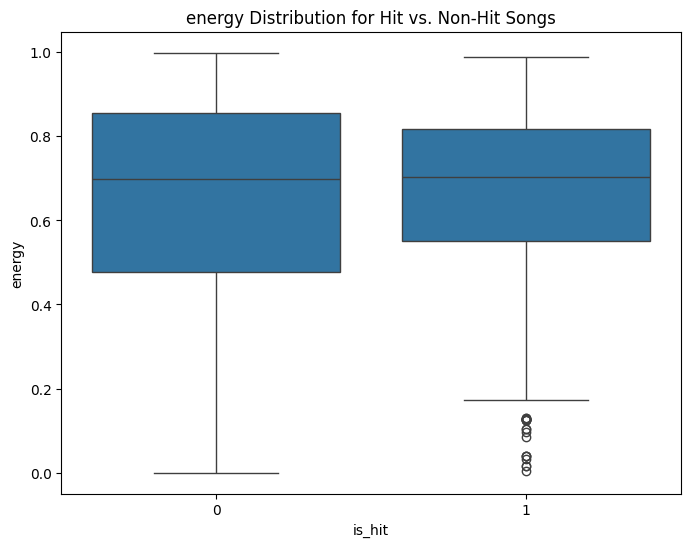

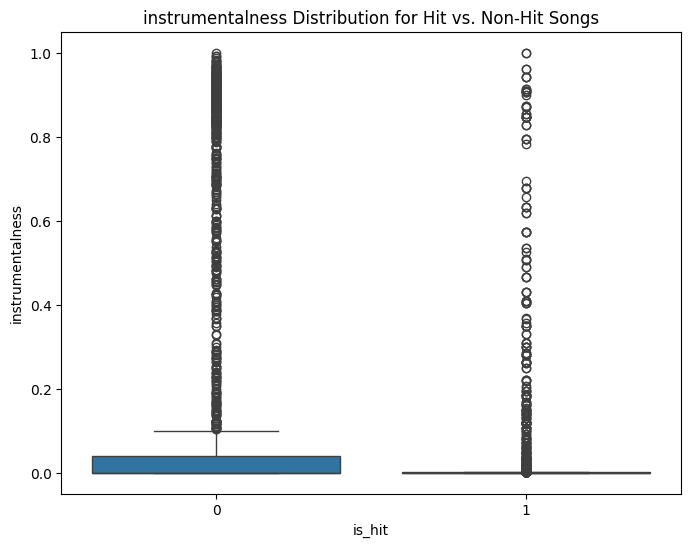

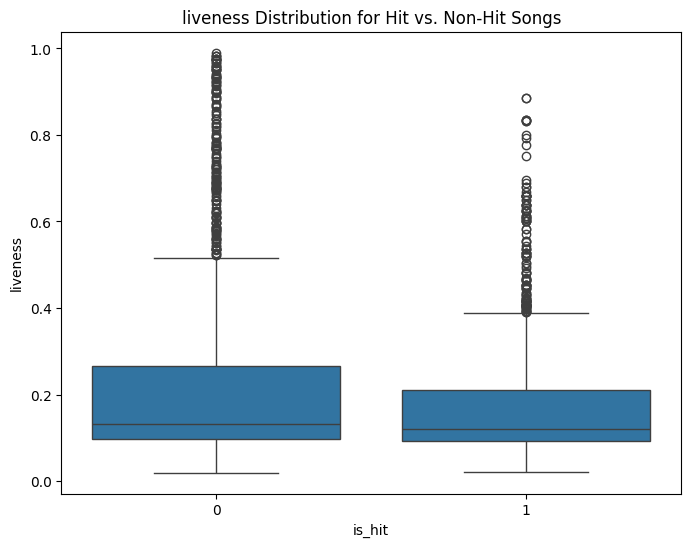

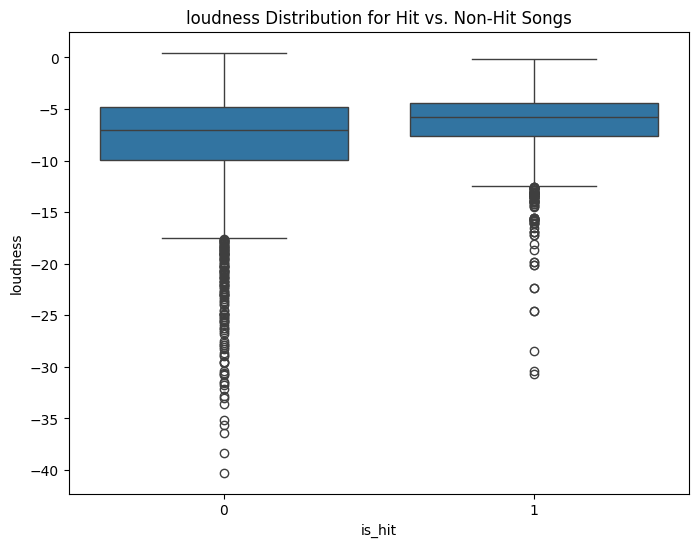

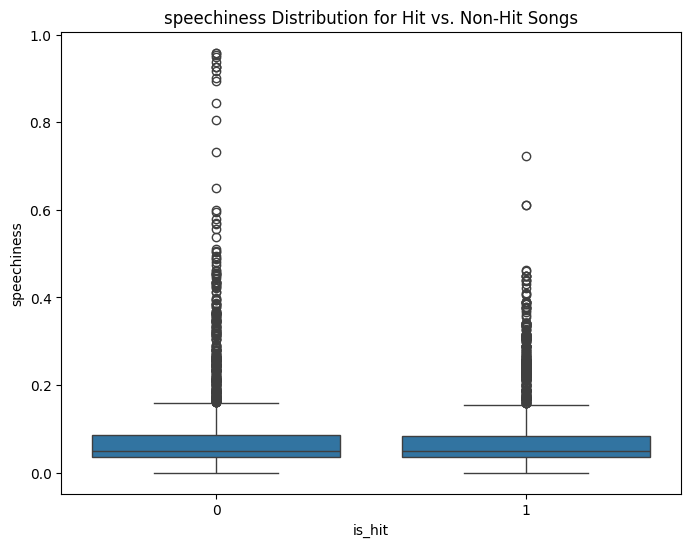

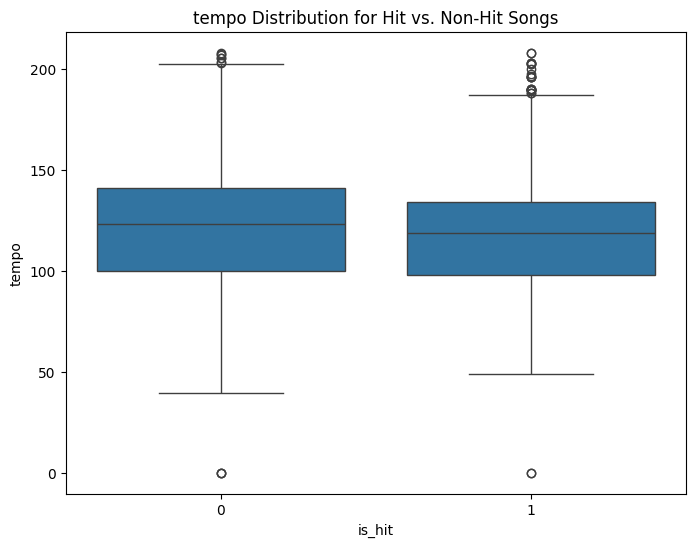

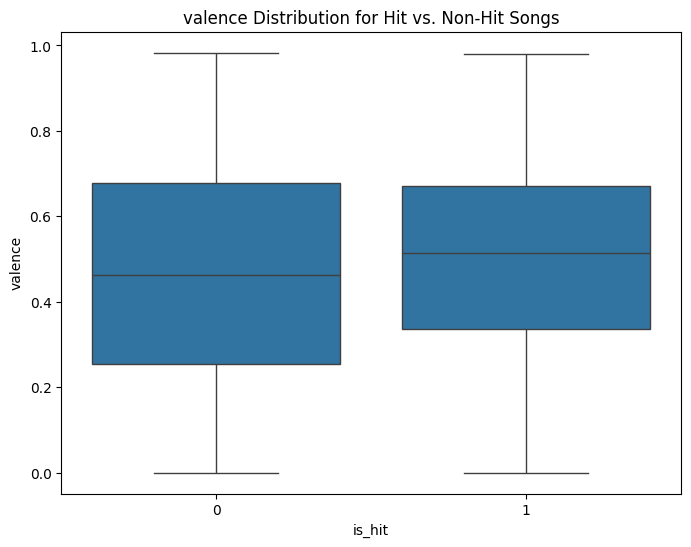

In [ ]:
# Select numerical features relevant to popularity
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                     'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Create box plots to compare distributions for hit and non-hit songs
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_hit', y=feature, data=data)
    plt.title(f'{feature} Distribution for Hit vs. Non-Hit Songs')
    plt.show()

4. Analyze categorical features

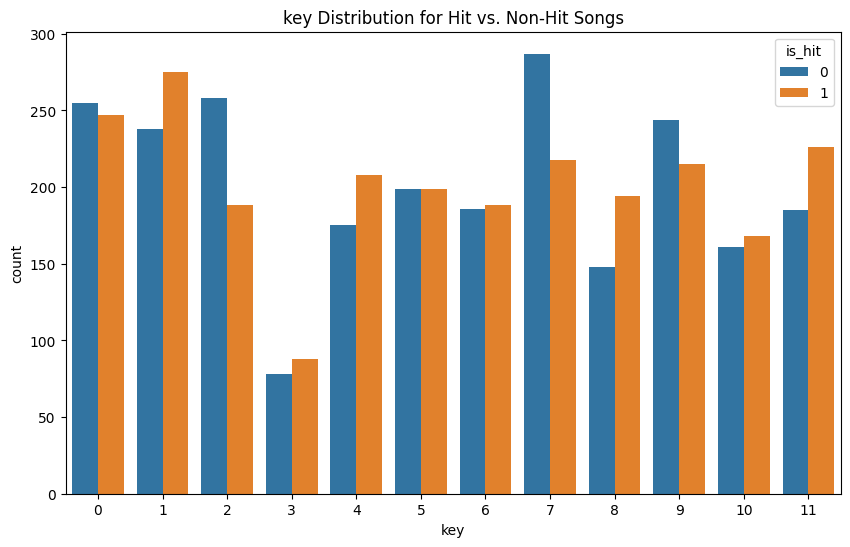

In [ ]:
# Select a categorical feature, e.g., 'key'
categorical_feature = 'key'

# Create a count plot to compare the frequency of each category for hit and non-hit songs
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_feature, hue='is_hit', data=data)
plt.title(f'{categorical_feature} Distribution for Hit vs. Non-Hit Songs')
plt.show()

Correlation analysis:

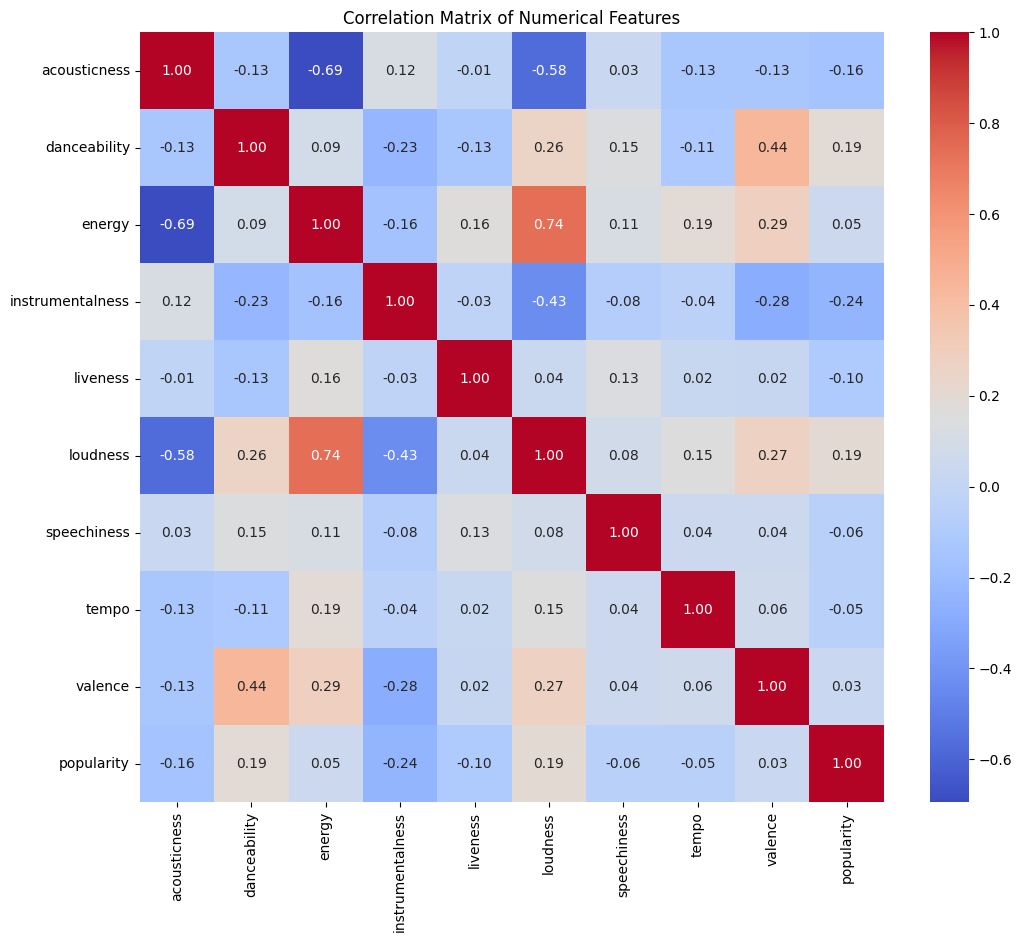

In [ ]:
# Calculate the correlation matrix for numerical features
correlation_matrix = data[numerical_features + ['popularity']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()